<a href="https://colab.research.google.com/github/ibonetc/ML_Doct_MSc/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selección de rasgos



## Métodos basados en filtros

### Eliminar rasgos con baja varianza (Rasgos quasi-constantes)

In [30]:
import pandas as pd
import numpy as np
import sklearn.feature_selection as fs
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/customer_satisfaction.csv')
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [178]:
len(data), len(data.columns)

(76020, 371)

In [179]:
data.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

In [174]:
sel = fs.VarianceThreshold(threshold=0.01)
sel.fit_transform(data)

array([[1.000e+00, 2.000e+00, 2.300e+01, ..., 0.000e+00, 3.921e+04,
        0.000e+00],
       [3.000e+00, 2.000e+00, 3.400e+01, ..., 0.000e+00, 4.928e+04,
        0.000e+00],
       [4.000e+00, 2.000e+00, 2.300e+01, ..., 0.000e+00, 6.733e+04,
        0.000e+00],
       ...,
       [1.518e+05, 2.000e+00, 2.300e+01, ..., 0.000e+00, 7.403e+04,
        0.000e+00],
       [1.518e+05, 2.000e+00, 2.500e+01, ..., 0.000e+00, 8.428e+04,
        0.000e+00],
       [1.518e+05, 2.000e+00, 4.600e+01, ..., 0.000e+00, 1.173e+05,
        0.000e+00]])

In [ ]:
sel.get_feature_names_out()

In [175]:
len(sel.get_feature_names_out())

274

In [176]:
quasi_constant = [col for col in data.columns if col not in sel.get_feature_names_out()]
len(quasi_constant)

97

In [15]:
quasi_constant

['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb

In [ ]:
sel.get_feature_names_out()

In [17]:
train = data[sel.get_feature_names_out()]
train

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0           1     2     23                 0.0                      0.0   
1           3     2     34                 0.0                      0.0   
2           4     2     23                 0.0                      0.0   
3           8     2     37                 0.0                    195.0   
4          10     2     39                 0.0                      0.0   
...       ...   ...    ...                 ...                      ...   
76015  151829     2     48                 0.0                      0.0   
76016  151830     2     39                 0.0                      0.0   
76017  151835     2     23                 0.0                      0.0   
76018  151836     2     25                 0.0                      0.0   
76019  151838     2     46                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                        195.0                      0.0   
4                          0.0                      0.0   
...                        ...                      ...   
76015                      0.0                      0.0   
76016                      0.0                      0.0   
76017                      0.0                      0.0   
76018                      0.0                      0.0   
76019                      0.0                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   
...                        ...                      ...   
76015                      0.0                      0.0   
76016                      0.0                      0.0   
76017                      0.0                      0.0   
76018                      0.0                      0.0   
76019                      0.0                      0.0   

       imp_op_var40_efect_ult3  ...  saldo_medio_var33_hace2  \
0                          0.0  ...                      0.0   
1                          0.0  ...                      0.0   
2                          0.0  ...                      0.0   
3                          0.0  ...                      0.0   
4                          0.0  ...                      0.0   
...                        ...  ...                      ...   
76015                      0.0  ...                      0.0   
76016                      0.0  ...                      0.0   
76017                      0.0  ...                      0.0   
76018                      0.0  ...                      0.0   
76019                      0.0  ...                      0.0   

       saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4                          0.0                     0.0   
...                        ...                     ...   
76015                      0.0                     0.0   
76016                      0.0                     0.0   
76017                      0.0                     0.0   
76018                      0.0                     0.0   
76019                      0.0                     0.0   

       saldo_medio_var33_ult3  saldo_medio_var44_hace2  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0

In [18]:
train.shape

(76020, 274)

### Por correlación

In [28]:
train.corr().style.background_gradient(cmap='Blues')

Calcular matriz de correlación

In [20]:
corr_matrix = train.corr()

Calcular los más correlacionados con la variable de salida

In [37]:
cor_target = abs(corr_matrix["TARGET"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

var15                  0.101322
ind_var5               0.135349
ind_var30              0.149811
num_var5               0.134095
num_var30              0.138289
num_var42              0.135693
var36                  0.102919
num_meses_var5_ult3    0.148253
TARGET                 1.000000
Name: TARGET, dtype: float64

In [39]:
len(relevant_features)

9

### [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)


In [40]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')

In [41]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [132]:
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

In [181]:
import sklearn.feature_selection as fs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [183]:
test = SelectKBest(score_func=fs.f_classif, k=4)
fit = test.fit(X, Y)

np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
print(features[0:5,:])

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


Teniendo en cuenta el ranking uno puede seleccionar una cantidad específica de rasgos

In [55]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=7)

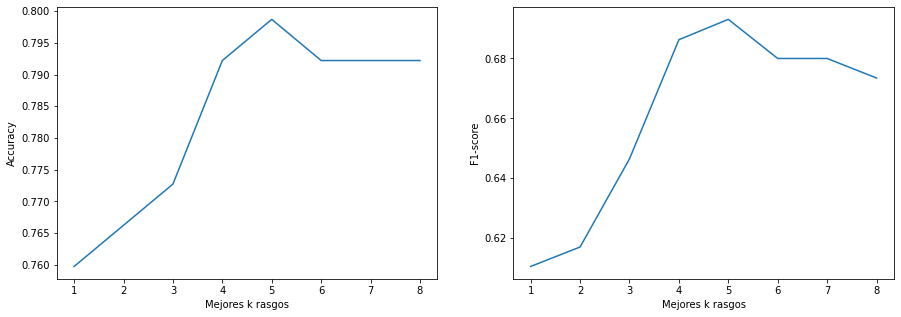

In [66]:
f1_list = []
accuracy_list=[]
for k in range(1, 9):
  bk = SelectKBest(fs.f_classif, k=k)
  bk.fit(train_x, train_y)
  X_train_trans = bk.transform(train_x)
  X_test_trans = bk.transform(test_x)
  lr = LogisticRegression(max_iter=1000)
  lr.fit(X_train_trans, train_y)
  y_pred = lr.predict(X_test_trans)
  accuracy=metrics.accuracy_score(test_y, y_pred)
  accuracy_list.append(accuracy)
  f1 = metrics.f1_score(test_y, y_pred)
  f1_list.append(f1)

fig, axe = plt.subplots(1,2,figsize=(15,5))
axe[0].plot(range(1, 9), accuracy_list)
axe[0].set_xlabel("Mejores k rasgos")
axe[0].set_ylabel("Accuracy")
axe[1].plot(range(1, 9), f1_list)
axe[1].set_xlabel("Mejores k rasgos")
axe[1].set_ylabel("F1-score")
plt.show()

In [204]:
np.argmax(accuracy_list)

4

In [205]:
accuracy_list[np.argmax(accuracy_list)]

0.7987012987012987

**Ejercicio**: Hacer con las otras formas de selección:
- chi-square (chi2)
- mutual_info_classif

### Las características también se puden probar por separado

In [63]:
MI=fs.mutual_info_classif(train_x, train_y)
MI

array([0.014, 0.118, 0.   , 0.023, 0.042, 0.085, 0.016, 0.053])

In [64]:
mi_score_selected_index = np.where(MI >0.2)[0]
X_train = train_x[:,mi_score_selected_index]
X_test = test_x[:,mi_score_selected_index]

**Ejercicio**: Probar con estos rasgos

**Ejercicio**: Probar con breast cancer

In [206]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']

### Relief

In [187]:
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

In [188]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=7)

In [ ]:
!pip install sklearn_relief

In [186]:
import sklearn_relief

In [201]:
r = sklearn_relief.ReliefF(n_features = 7)
X_train=r.fit_transform(train_x,train_y)
X_test=r.transform(test_x)
X_train

array([[3.30e+01, 2.63e-01, 3.61e+01, ..., 4.30e+01, 7.20e+01, 1.08e+02],
       [2.30e+01, 1.27e-01, 4.55e+01, ..., 3.60e+01, 8.60e+01, 1.02e+02],
       [3.10e+01, 8.03e-01, 3.29e+01, ..., 0.00e+00, 7.80e+01, 1.58e+02],
       ...,
       [6.70e+01, 7.35e-01, 2.17e+01, ..., 0.00e+00, 6.00e+01, 5.70e+01],
       [2.10e+01, 1.87e-01, 2.43e+01, ..., 0.00e+00, 5.80e+01, 1.05e+02],
       [3.60e+01, 7.19e-01, 3.27e+01, ..., 4.20e+01, 7.20e+01, 1.79e+02]])

In [202]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, train_y)
y_pred = lr.predict(X_test)
accuracy=metrics.accuracy_score(test_y, y_pred)
accuracy

0.7922077922077922

## Wrapper


### Forward Selection

In [134]:
from sklearn.svm import SVC

In [211]:
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.9, random_state=42)

In [208]:
sfs = fs.SequentialFeatureSelector(SVC(), n_features_to_select=2, cv=10)

In [213]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(cv=10, estimator=SVC(), n_features_to_select=2)

In [214]:
sfs.get_feature_names_out()

array(['x1', 'x5'], dtype=object)

### Recursive Feature Elimination

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [82]:
from sklearn.preprocessing import StandardScaler

In [142]:
X_stand = StandardScaler().fit_transform(X_train)

In [215]:
model = LogisticRegression()
rfe = RFE(model, step = 1)
fit = rfe.fit(X_stand, y_train)
print("Número de rasgos: %s" % (fit.n_features_))
print("Rasgos seleccionados: %s" % (fit.support_))
print("Ranking de rasgos: %s" % (fit.ranking_))

Número de rasgos: 4
Rasgos seleccionados: [ True  True False False  True  True False False]
Ranking de rasgos: [1 1 2 5 1 1 3 4]


### Recursive Feature Elimination con Validación Cruzada

In [144]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [145]:
svc = SVC(kernel="linear")
min_features_to_select = 1 
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(10),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

In [146]:
rfecv.cv_results_['mean_test_score']

array([0.645, 0.671, 0.737, 0.776, 0.763, 0.763, 0.75 , 0.789])

In [147]:
print("Número óptimo de rasgos : %d" % rfecv.n_features_)

Número óptimo de rasgos : 8


In [148]:
rfecv.cv_results_

{'mean_test_score': array([0.645, 0.671, 0.737, 0.776, 0.763, 0.763, 0.75 , 0.789]),
 'split0_test_score': array([0.658, 0.658, 0.684, 0.789, 0.763, 0.763, 0.737, 0.816]),
 'split1_test_score': array([0.632, 0.684, 0.789, 0.763, 0.763, 0.763, 0.763, 0.763]),
 'std_test_score': array([0.013, 0.013, 0.053, 0.013, 0.   , 0.   , 0.013, 0.026])}

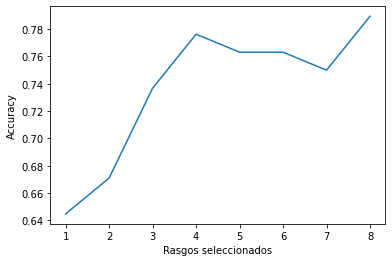

In [149]:
plt.figure()
plt.xlabel("Rasgos seleccionados")
plt.ylabel("Accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score']
)
plt.show()

## Embedded

### Selección basada en L1

In [150]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [151]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=2000).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(768, 4)

### Basada en árbol

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
gb = GradientBoostingClassifier(n_estimators=20)
gb.fit(X_train, y_train)
print(gb.feature_importances_)

[0.064 0.298 0.012 0.03  0.094 0.151 0.238 0.112]


In [154]:
model = fs.SelectFromModel(gb, prefit=True)
X_trans = model.transform(X)
print(X_train.shape)
print(X_trans.shape)

(76, 8)
(768, 3)


In [159]:
indexs=df.iloc[:,:-1].columns

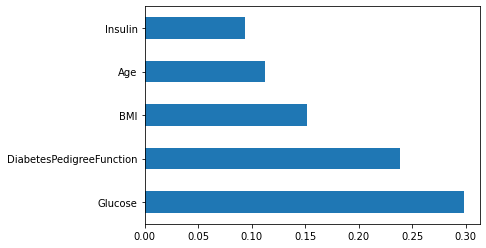

In [163]:
n=len(gb.feature_importances_)
(pd.Series(gb.feature_importances_, index=indexs)
   .nlargest(5)
   .plot(kind='barh'))  

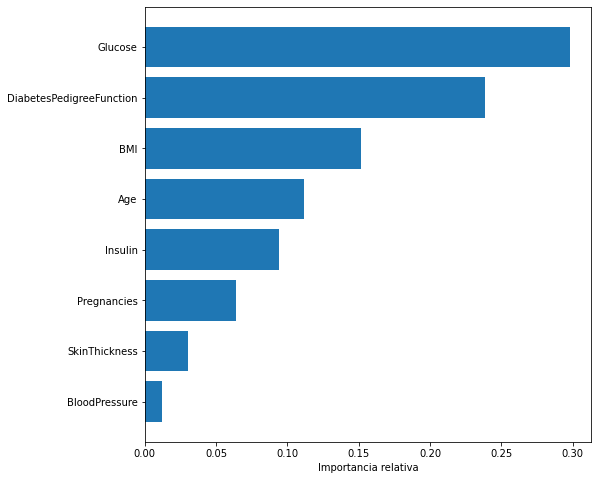

In [164]:
feature_importance = 100.0 * (gb.feature_importances_ / gb.feature_importances_.max())
sorted_idx = np.argsort(gb.feature_importances_)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(8, 8))
plt.barh(pos, gb.feature_importances_[sorted_idx], align='center')
plt.yticks(pos, indexs[sorted_idx])
plt.xlabel('Importancia relativa')
plt.show()

## Importancia de rasgos con ShAP (Shapely Additive Explanations)

Este valor es la contribución marginal promedio de un valor de característica en todas las posibles combinaciones de características. 

Está basado en al teoría de juegos. En este caso se puede asumir el **juego** es la predicción de una instancia de la base de datos. Cada rasgo en un **jugador** que colabora para recibir la ganancia (O en algunos casos un conjunto de rasgos puede ser un jugador, si los unimos). La **ganancia** es la predicción real para esta instancia menos la predicción promedio para todas las instancias. 

Algo importante es que esta medida es local y no global como la mayoría de las medidas de importancia de rasgos. ShAP mide caso a caso la contribución de cada rasgo.

El valor de Shapley es el promedio de todas las contribuciones marginales a todas las coaliciones posibles. El tiempo de cálculo aumenta exponencialmente con el número de características. Una solución para mantener manejable el tiempo de cálculo es calcular las contribuciones de solo unas pocas muestras de las posibles coaliciones.

Ver: https://christophm.github.io/interpretable-ml-book/shapley.html#shapley

In [166]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.2 MB/s 


In [167]:
import shap

In [220]:
explainer = shap.Explainer(gb, X_train, feature_names=indexs)
shap_values = explainer(X_train)

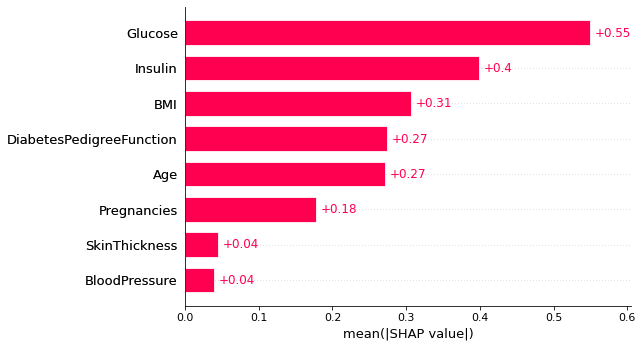

In [221]:
shap.plots.bar(shap_values)

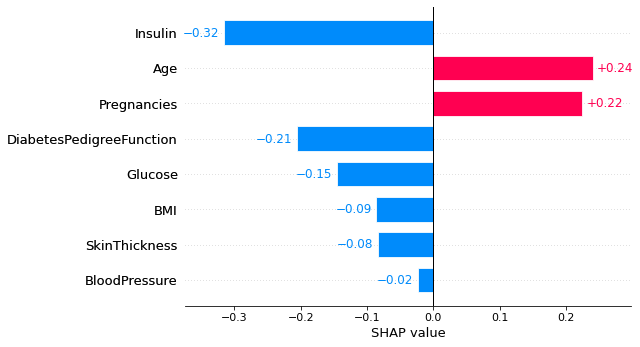

In [222]:
shap.plots.bar(shap_values[0])

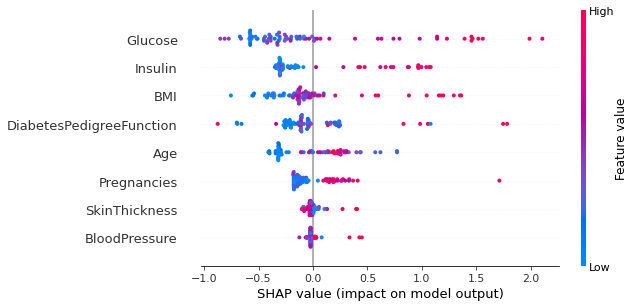

In [223]:
shap.summary_plot(shap_values, features=X_train)